In [2]:
from gratin.simulation.diffusion_models import generators
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib.colors import Normalize
from matplotlib import colormaps
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [42]:
def TA_MSD(t, TA:bool = True):
    dist = squareform(pdist(t)**2)
    if TA:
        return np.array([np.mean(np.diag(dist,k=i)[::max(i,1)]) for i in range(t.shape[0])])
    else:
        return dist[0,:]

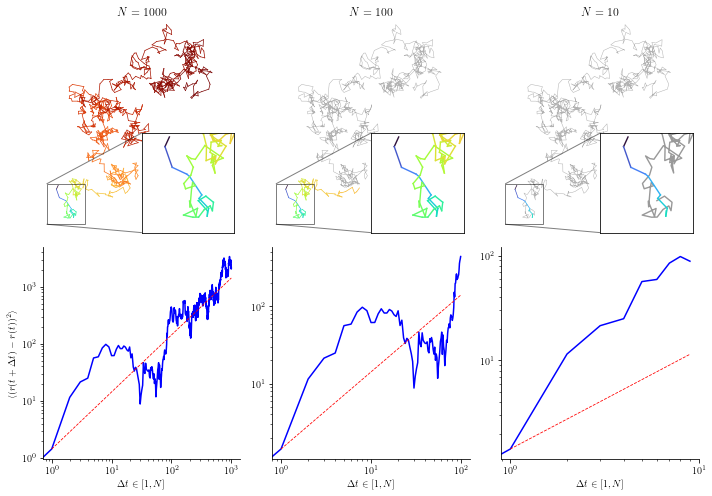

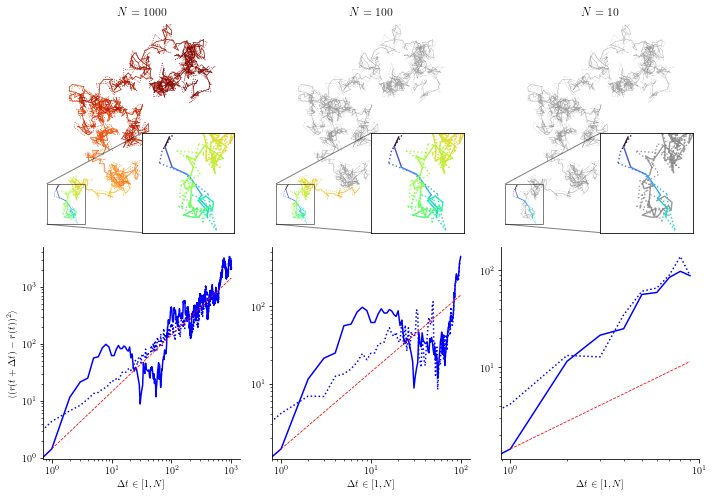

In [44]:
np.random.seed(1)
sigma = .75
t_ = generators[2]["BM"](1000,alpha=1.)
M = np.max(np.max(t_,axis=0) - np.min(t_,axis=0)) 
t_ = t_-np.min(t_,axis=0)
t_noise_ = t_ + sigma*np.random.randn(*t_.shape)
xm, xM = min(np.min(t_[:10,0]),np.min(t_noise_[:10,0])), max(np.max(t_[:10,0]),np.max(t_noise_[:10,0]))
ym, yM = min(np.min(t_[:10,1]),np.min(t_noise_[:10,1])), max(np.max(t_[:10,1]),np.max(t_noise_[:10,1]))
D = max(xM-xm,yM-ym) + .5
xm, xM = (xm + xM -D)/2, (xm + xM +D)/2
ym, yM = (ym + yM -D)/2, (ym + yM +D)/2

TA=False


for show_noise in [False,True]:
    fig = plt.figure(figsize=(10,7))
    for i, N in enumerate([10,100,1000][::-1]):
        
        t = t_[:N]
        t_noise = t_noise_[:N]
        dist_noise = pdist(t)**2
        msd = TA_MSD(t, TA=TA)
        msd_noise = TA_MSD(t_noise)

        ax = fig.add_subplot(2,3,i+1)
        ax.set_title("$N=%d$" % N)

        axins = ax.inset_axes([0.5, 0., 0.47, 0.47])
        axins.set_xlim((xm,xM))
        axins.set_ylim((ym,yM))
        axins.set_xticks([])
        axins.set_yticks([])

        ax.plot(t_[N:,0],t_[N:,1],c="grey",lw=.5,alpha=.6)
        axins.plot(t_[N:,0],t_[N:,1],c="grey",lw=1.4,alpha=.8)
        if show_noise:
            ax.plot(t_noise_[N:,0],t_noise_[N:,1],c="grey",lw=.5,alpha=.6,ls=":")
            axins.plot(t_noise_[N:,0],t_noise_[N:,1],c="grey",lw=1.4,alpha=.8,ls=":")
        for j in range(N-1):
            c = colormaps["turbo"](1+np.log10((j+1)/1000.)/(3.))
            for k, a in enumerate([ax, axins]):
                a.plot(t[j:(j+2),0],t[j:(j+2),1],c=c,lw=.7*(k+1))
                if show_noise:
                    a.plot(t_noise[j:(j+2),0],t_noise[j:(j+2),1],c=c,lw=.7*(k+1),ls=":")
        

        ax.indicate_inset_zoom(axins, edgecolor="black")
        ax.set_xlim((-4,M+1))
        ax.set_ylim((-4,M+1))
        plt.axis("off")

        ax = fig.add_subplot(2,3,i+4)
        ax.plot(msd,c="blue")
        if show_noise:
            ax.plot(msd_noise,c="blue",ls=":",lw=1.5)
        ax.plot([1,N-1],[msd[1],(N-2)*msd[1]],c="red",ls="--",lw=.8)
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_xlabel("$\Delta t \in \left[1,N\\right]$")
        if i == 0:
            ax.set_ylabel("$\langle (r(t+\Delta t) - r(t))^2 \\rangle$")

        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
    plt.tight_layout()
    plt.savefig("/Users/hverdier/Desktop/soutenance/bm_%s.png" % ("noise" if show_noise else "raw"),dpi=180)

In [ ]:
np.random.seed(2)
sigma = .75
alpha = .6
t_ = generators[2]["CTRW"](T=1000,alpha=alpha)
M = np.max(np.max(t_,axis=0) - np.min(t_,axis=0)) 
t_ = t_-np.min(t_,axis=0)
t_noise_ = t_ + sigma*np.random.randn(*t_.shape)
xm, xM = min(np.min(t_[:10,0]),np.min(t_noise_[:10,0])), max(np.max(t_[:10,0]),np.max(t_noise_[:10,0]))
ym, yM = min(np.min(t_[:10,1]),np.min(t_noise_[:10,1])), max(np.max(t_[:10,1]),np.max(t_noise_[:10,1]))
D = max(xM-xm,yM-ym) + .5
xm, xM = (xm + xM -D)/2, (xm + xM +D)/2
ym, yM = (ym + yM -D)/2, (ym + yM +D)/2

TA = False

for show_noise in [False,True]:
    fig = plt.figure(figsize=(10,7))
    for i, N in enumerate([10,100,1000][::-1]):
        
        t = t_[:N]
        t_noise = t_noise_[:N]
        dist_noise = pdist(t)**2
        msd = TA_MSD(t,TA=TA)
        msd_noise = TA_MSD(t_noise, TA=TA)

        ax = fig.add_subplot(2,3,i+1)
        ax.set_title("$N=%d$" % N)

        axins = ax.inset_axes([0.5, 0., 0.47, 0.47])
        axins.set_xlim((xm,xM))
        axins.set_ylim((ym,yM))
        axins.set_xticks([])
        axins.set_yticks([])

        ax.plot(t_[(N-1):,0],t_[(N-1):,1],c="grey",lw=.5,alpha=.6)
        axins.plot(t_[(N-1):,0],t_[(N-1):,1],c="grey",lw=1.4,alpha=.8)
        if show_noise:
            ax.plot(t_noise_[(N-1):,0],t_noise_[(N-1):,1],c="grey",lw=.5,alpha=.6,ls=":")
            axins.plot(t_noise_[(N-1):,0],t_noise_[(N-1):,1],c="grey",lw=1.4,alpha=.8,ls=":")
        for j in range(N+1):
            c = colormaps["turbo"](1+np.log10((j+1)/1000.)/(3.))
            for k, a in enumerate([ax, axins]):
                a.plot(t[j:(j+2),0],t[j:(j+2),1],c=c,lw=.7*(k+1))
                if show_noise:
                    a.plot(t_noise[j:(j+2),0],t_noise[j:(j+2),1],c=c,lw=.7*(k+1),ls=":")
        

        ax.indicate_inset_zoom(axins, edgecolor="black")
        ax.set_xlim((-4,M+1))
        ax.set_ylim((-4,M+1))
        plt.axis("off")

        ax = fig.add_subplot(2,3,i+4)
        ax.plot(msd,c="blue")
        if show_noise:
            ax.plot(msd_noise,c="blue",ls=":",lw=1.5)
        ax.plot([1,N-1],[1,(N-2)**alpha],c="red",ls="--",lw=.8)
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_xlabel("$\Delta t \in \left[1,N\\right]$")
        if i == 0:
            ax.set_ylabel("$\langle (r(t+\Delta t) - r(t))^2 \\rangle$")

        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
    plt.tight_layout()
    plt.savefig("/Users/hverdier/Desktop/soutenance/fbm_%s.png" % ("noise" if show_noise else "raw"),dpi=180)

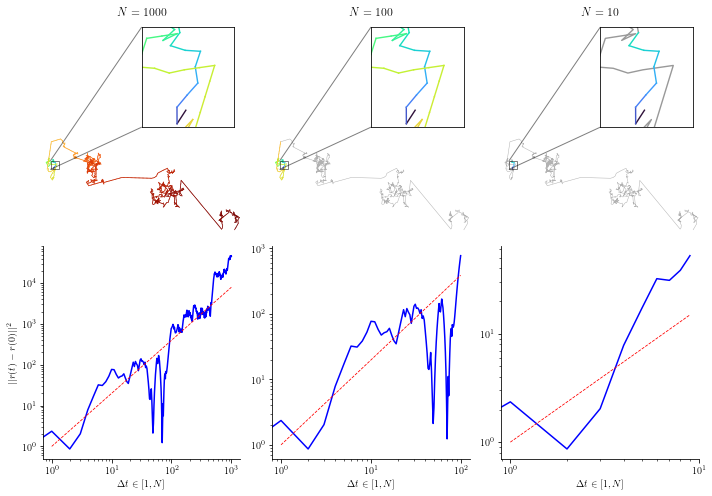

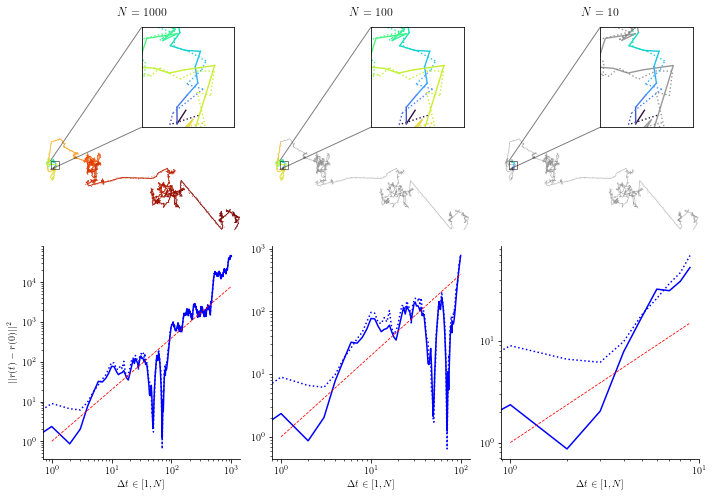

In [59]:
np.random.seed(2)
sigma = .75
alpha = 1.3
model = "LW"
t_ = generators[2][model](T=1000,alpha=alpha)
M = np.max(np.max(t_,axis=0) - np.min(t_,axis=0)) 
t_ = t_-np.min(t_,axis=0)
t_noise_ = t_ + sigma*np.random.randn(*t_.shape)
xm, xM = min(np.min(t_[:10,0]),np.min(t_noise_[:10,0])), max(np.max(t_[:10,0]),np.max(t_noise_[:10,0]))
ym, yM = min(np.min(t_[:10,1]),np.min(t_noise_[:10,1])), max(np.max(t_[:10,1]),np.max(t_noise_[:10,1]))
D = max(xM-xm,yM-ym) + .5
xm, xM = (xm + xM -D)/2, (xm + xM +D)/2
ym, yM = (ym + yM -D)/2, (ym + yM +D)/2

TA = False

for show_noise in [False,True]:
    fig = plt.figure(figsize=(10,7))
    for i, N in enumerate([10,100,1000][::-1]):
        
        t = t_[:N]
        t_noise = t_noise_[:N]
        dist_noise = pdist(t)**2
        msd = TA_MSD(t,TA=TA)
        msd_noise = TA_MSD(t_noise, TA=TA)

        ax = fig.add_subplot(2,3,i+1)
        ax.set_title("$N=%d$" % N)

        axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
        axins.set_xlim((xm,xM))
        axins.set_ylim((ym,yM))
        axins.set_xticks([])
        axins.set_yticks([])

        ax.plot(t_[(N-1):,0],t_[(N-1):,1],c="grey",lw=.5,alpha=.6)
        axins.plot(t_[(N-1):,0],t_[(N-1):,1],c="grey",lw=1.4,alpha=.8)
        if show_noise:
            ax.plot(t_noise_[(N-1):,0],t_noise_[(N-1):,1],c="grey",lw=.5,alpha=.6,ls=":")
            axins.plot(t_noise_[(N-1):,0],t_noise_[(N-1):,1],c="grey",lw=1.4,alpha=.8,ls=":")
        for j in range(N+1):
            c = colormaps["turbo"](1+np.log10((j+1)/1000.)/(3.))
            for k, a in enumerate([ax, axins]):
                a.plot(t[j:(j+2),0],t[j:(j+2),1],c=c,lw=.7*(k+1))
                if show_noise:
                    a.plot(t_noise[j:(j+2),0],t_noise[j:(j+2),1],c=c,lw=.7*(k+1),ls=":")
        

        ax.indicate_inset_zoom(axins, edgecolor="black")
        ax.set_xlim((-4,M+1))
        ax.set_ylim((-4,M+1))
        plt.axis("off")

        ax = fig.add_subplot(2,3,i+4)
        ax.plot(msd,c="blue")
        if show_noise:
            ax.plot(msd_noise,c="blue",ls=":",lw=1.5)
        ax.plot([1,N-1],[1,(N-2)**alpha],c="red",ls="--",lw=.8)
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_xlabel("$\Delta t \in \left[1,N\\right]$")
        if i == 0:
            if TA:
                ax.set_ylabel("$\langle ||r(t+\Delta t) - r(t)||^2 \\rangle$")
            else:
                ax.set_ylabel("$||r(t)-r(0)||^2$")

        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
    plt.tight_layout()
    plt.savefig("/Users/hverdier/Desktop/soutenance/%s_%s.png" % (model, "noise" if show_noise else "raw"),dpi=180)

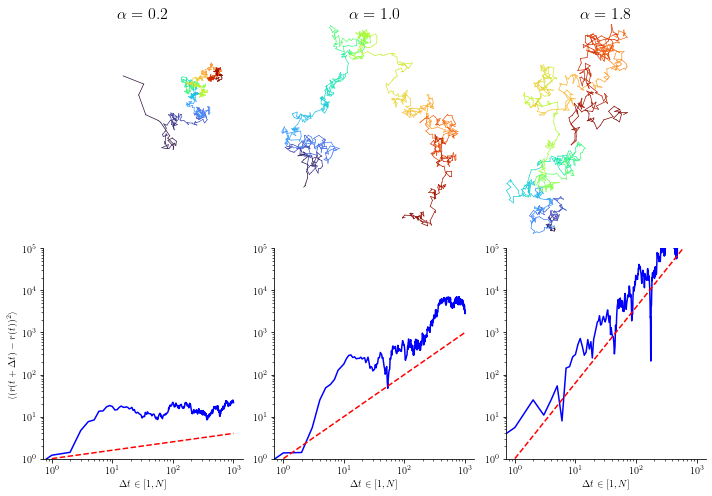

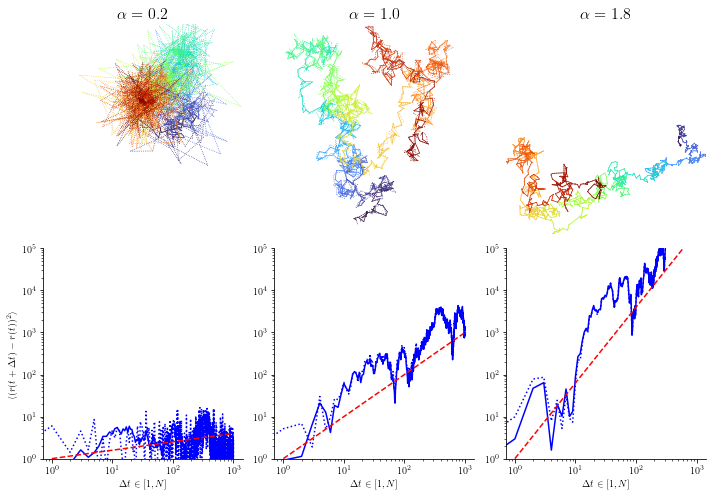

In [46]:
np.random.seed(1)
sigma = .75
N = 1000
TA = False


for show_noise in [False,True]:
    fig = plt.figure(figsize=(10,7))
    for i, alpha in enumerate([0.2,1.,1.8]):

        t_ = generators[2]["sBM"](T=N,alpha=alpha)
        M = np.max(np.max(t_,axis=0) - np.min(t_,axis=0)) 
        t_ = t_-np.min(t_,axis=0)
        t_noise_ = t_ + sigma*np.random.randn(*t_.shape)
        xm, xM = min(np.min(t_[:10,0]),np.min(t_noise_[:10,0])), max(np.max(t_[:10,0]),np.max(t_noise_[:10,0]))
        ym, yM = min(np.min(t_[:10,1]),np.min(t_noise_[:10,1])), max(np.max(t_[:10,1]),np.max(t_noise_[:10,1]))
        D = max(xM-xm,yM-ym) + .5
        xm, xM = (xm + xM -D)/2, (xm + xM +D)/2
        ym, yM = (ym + yM -D)/2, (ym + yM +D)/2
        
        
        t = t_[:N]
        t_noise = t_noise_[:N]
        dist_noise = pdist(t)**2
        msd = TA_MSD(t, TA)
        msd_noise = TA_MSD(t_noise,TA)

        ax = fig.add_subplot(2,3,i+1)
        ax.set_title("$\\alpha=%.1f$" % alpha, fontsize=16)
        for j in range(N-1):
            c = colormaps["turbo"](j/N)
            for k, a in enumerate([ax]):
                a.plot(t[j:(j+2),0],t[j:(j+2),1],c=c,lw=.7*(k+1))
                if show_noise:
                    a.plot(t_noise[j:(j+2),0],t_noise[j:(j+2),1],c=c,lw=.7*(k+1),ls=":")
        
        ax.set_xlim((-4,M+1))
        ax.set_ylim((-4,M+1))
        plt.axis("off")

        ax = fig.add_subplot(2,3,i+4)
        ax.plot(msd,c="blue")
        if show_noise:
            ax.plot(msd_noise,c="blue",ls=":",lw=1.5)
        ax.plot([1,N-1],[1,((N-2)**alpha)],c="red",ls="--",lw=1.5)
        ax.set_ylim((1,10**5))
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_xlabel("$\Delta t \in \left[1,N\\right]$")
        if i == 0:
            ax.set_ylabel("$\langle (r(t+\Delta t) - r(t))^2 \\rangle$")

        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        
    plt.tight_layout()
    plt.savefig("/Users/hverdier/Desktop/soutenance/sbm_%s.png" % ("noise" if show_noise else "raw"),dpi=180)

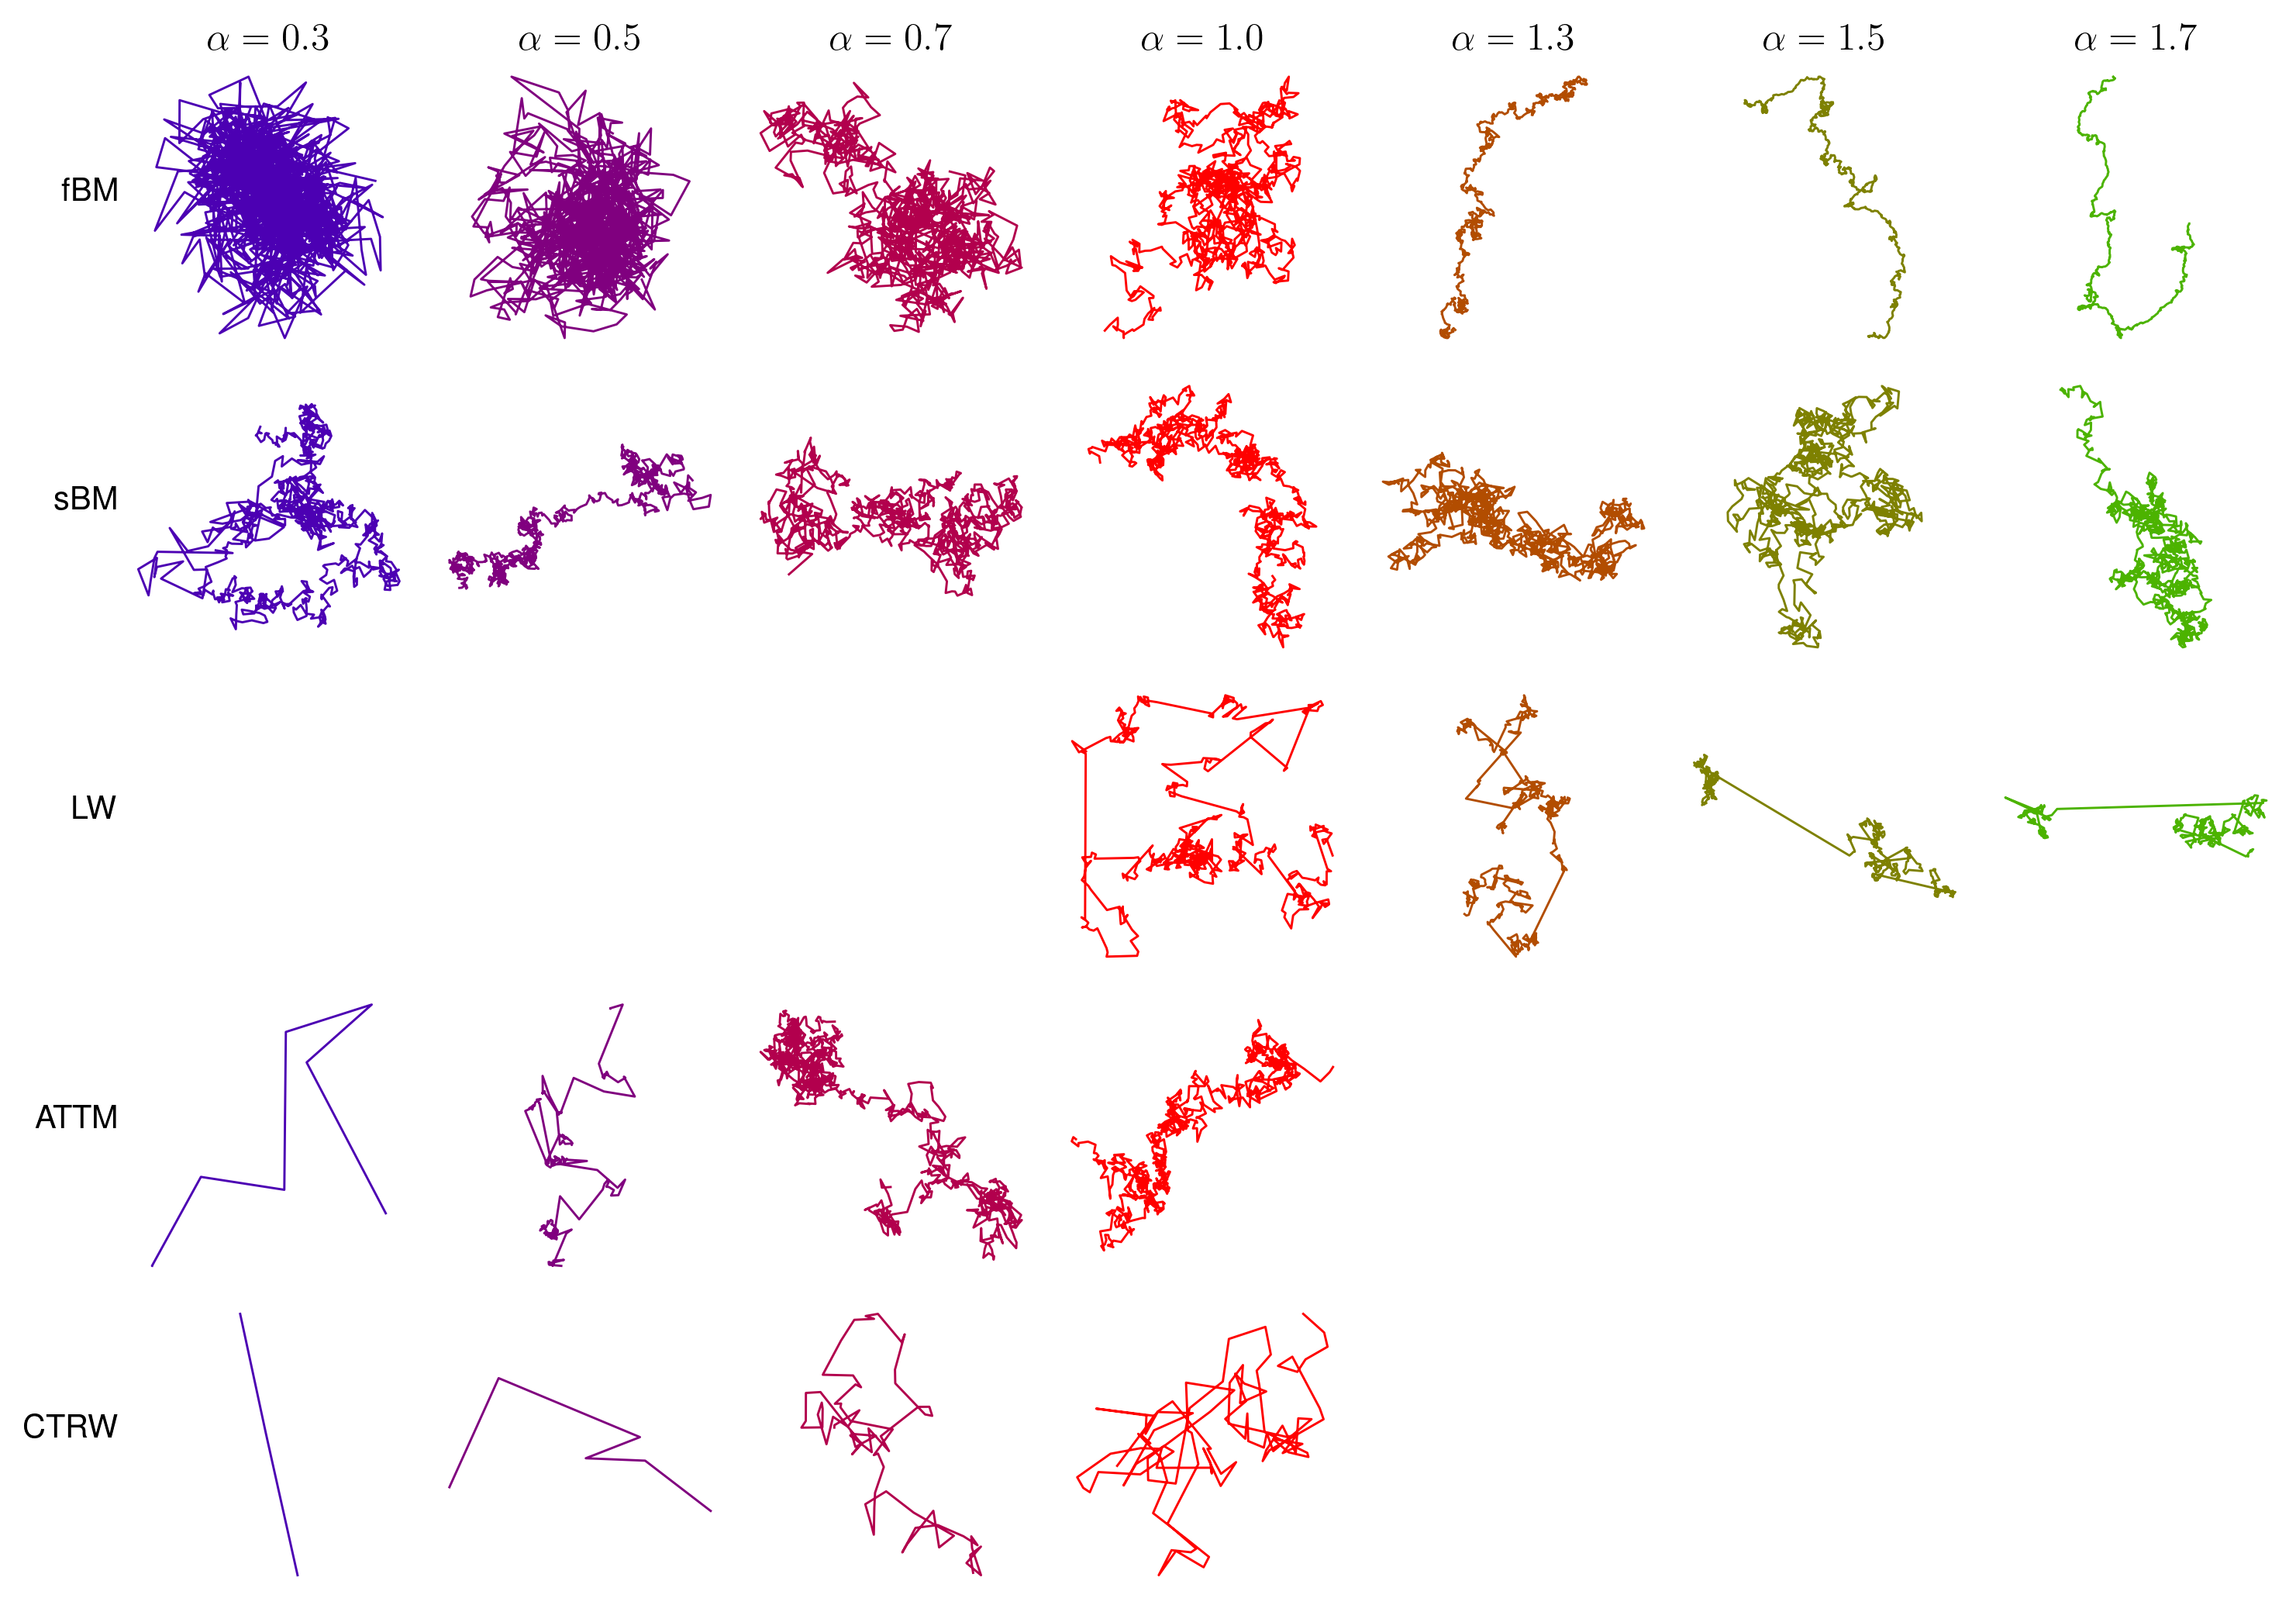

In [38]:
models = ["fBM","sBM","LW","ATTM","CTRW"]
alpha_range={"fBM":(0,2),"sBM":(0,2),"LW":(1,2),"ATTM":(0,1),"CTRW":(0,1)}
T = 1000
alphas = [0.3,.5,.7,1.,1.3,1.5,1.7]
fig = plt.figure(figsize=(10,7),dpi=300)

for i, m in enumerate(models):
    for j, a in enumerate(alphas):
        ax = fig.add_subplot(len(models),len(alphas),i*len(alphas)+1+j)
        if a >= alpha_range[m][0] and a <= alpha_range[m][1]:
            
            
            t_ = generators[2][m](T=T,alpha=a)
            M = np.max(np.max(t_,axis=0) - np.min(t_,axis=0)) 
            t_ = t_-np.min(t_,axis=0)
            xm, xM = np.min(t_[:,0]), np.max(t_[:,0])
            ym, yM = np.min(t_[:,1]), np.max(t_[:,1])
            D = max(xM-xm,yM-ym)*1.05
            xm, xM = (xm + xM -D)/2, (xm + xM +D)/2
            ym, yM = (ym + yM -D)/2, (ym + yM +D)/2

            ax.plot(t_[:,0],t_[:,1],c=colormaps["brg"](a/2),lw=.7)
            ax.set_xlim(xm,xM)
            ax.set_ylim(ym,yM)
            
        ax.set_aspect("equal")
        #ax.set_title("%s - %.1f" % (m,a))
        if i == 0:
            ax.set_title("$\\alpha = %.1f$" % a)
        if j == 0:
            ax.set_ylabel(m,rotation=0,ha="right")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        ax.spines.left.set_visible(False)
        ax.spines.bottom.set_visible(False)
            


plt.tight_layout()
plt.savefig("/Users/hverdier/Desktop/RW.pdf")

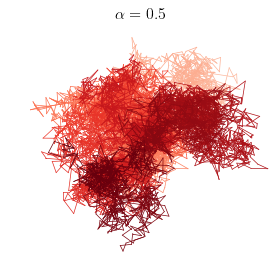

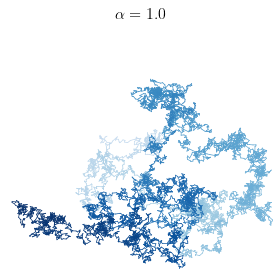

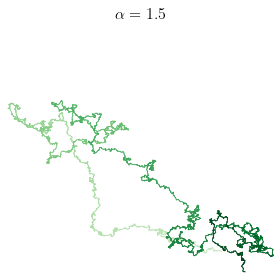

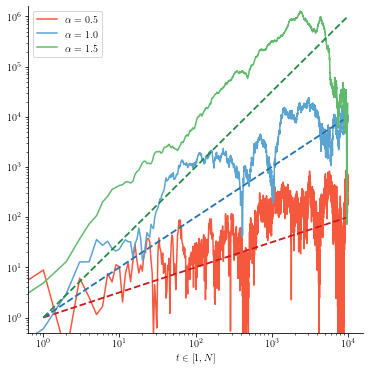

In [69]:
np.random.seed(2)
model = "fBM"


TA = False

trajs = {}
N = 10000

cmaps = ["Reds","Blues","Greens"]
for i, (alpha,cmap) in enumerate(zip([.5,1.,1.5],cmaps)):

    fig = plt.figure(figsize=(4,4))
    t_ = generators[2][model](T=N,alpha=alpha)
    
    M = np.max(np.max(t_,axis=0) - np.min(t_,axis=0)) 
    t_ = t_-np.min(t_,axis=0)
    xm, xM = np.min(t_[:,0]), np.max(t_[:,0])
    ym, yM = np.min(t_[:,1]), np.max(t_[:,1])
    D = max(xM-xm,yM-ym) + .5
    xm, xM = (xm + xM -D)/2, (xm + xM +D)/2
    ym, yM = (ym + yM -D)/2, (ym + yM +D)/2
    trajs[alpha] = t_

    t = t_[:N]
    msd = TA_MSD(t,TA=TA)
    msd_noise = TA_MSD(t_noise, TA=TA)

    ax = fig.add_subplot(111)
    ax.set_title("$\\alpha=%.1f$" % alpha,fontsize=16)

    ax.plot(t_[(N-1):,0],t_[(N-1):,1],c="grey",lw=.5,alpha=.6)
    for j in range(N+1):
        c = colormaps[cmap](0.25 + 0.75*j/N)
        for k, a in enumerate([ax]):
            a.plot(t[j:(j+2),0],t[j:(j+2),1],c=c,lw=.7*(k+1))
    
    ax.set_xlim((-4,M+1))
    ax.set_ylim((-4,M+1))
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("/Users/hverdier/Desktop/soutenance/alpha_%.1f_traj.png" % alpha,dpi=180)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
for alpha, cmap in zip(trajs,cmaps):
    
    msd = TA_MSD(trajs[alpha],TA=TA)
    ax.plot(msd,c=colormaps[cmap](0.55),label="$\\alpha=%.1f$" % alpha)
    ax.plot([1,N-1],[1,(N-2)**alpha],c=colormaps[cmap](.75),ls="--",lw=1.8)
ax.legend()
ax.set_ylim([0.5,10**6.2])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$t \in \left[1,N\\right]$")
if i == 0:
    if TA:
        ax.set_ylabel("$\langle ||r(t+\Delta t) - r(t)||^2 \\rangle$")
    else:
        ax.set_ylabel("$||r(t)-r(0)||^2$")

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig("/Users/hverdier/Desktop/soutenance/alpha_MSD.png",dpi=180)
    